# 4.寻找两个正序数组的中位数

结果比第一次要好，但还是有改进的地方

## 4.1题目描述

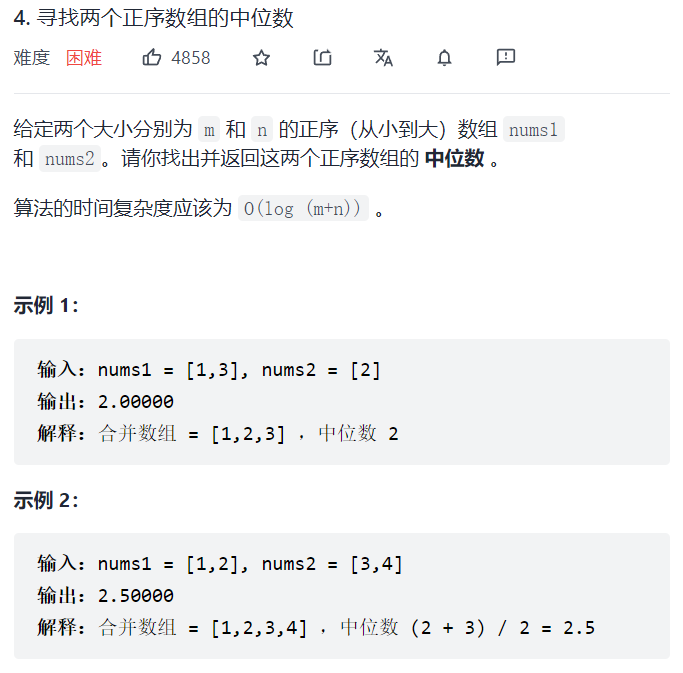

## 4.2对比结果

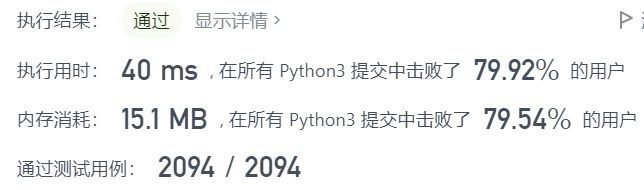

## 4.3我的代码

In [13]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        whole_set = nums1 + nums2
        whole_set = sorted(whole_set)
        if len(whole_set)%2 == 1:
            temp = whole_set[int(len(whole_set)/2)]
        elif len(whole_set)%2 == 0:
            temp = (whole_set[int(len(whole_set)/2)]+whole_set[int(len(whole_set)/2)-1])/2
        return temp

NameError: name 'List' is not defined

## 4.4官方代码

### 4.4.1方法一：二分查找

In [14]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        def getKthElement(k):
            """
            - 主要思路：要找到第 k (k>1) 小的元素，那么就取 pivot1 = nums1[k/2-1] 和 pivot2 = nums2[k/2-1] 进行比较
            - 这里的 "/" 表示整除
            - nums1 中小于等于 pivot1 的元素有 nums1[0 .. k/2-2] 共计 k/2-1 个
            - nums2 中小于等于 pivot2 的元素有 nums2[0 .. k/2-2] 共计 k/2-1 个
            - 取 pivot = min(pivot1, pivot2)，两个数组中小于等于 pivot 的元素共计不会超过 (k/2-1) + (k/2-1) <= k-2 个
            - 这样 pivot 本身最大也只能是第 k-1 小的元素
            - 如果 pivot = pivot1，那么 nums1[0 .. k/2-1] 都不可能是第 k 小的元素。把这些元素全部 "删除"，剩下的作为新的 nums1 数组
            - 如果 pivot = pivot2，那么 nums2[0 .. k/2-1] 都不可能是第 k 小的元素。把这些元素全部 "删除"，剩下的作为新的 nums2 数组
            - 由于我们 "删除" 了一些元素（这些元素都比第 k 小的元素要小），因此需要修改 k 的值，减去删除的数的个数
            """
            
            index1, index2 = 0, 0
            while True:
                # 特殊情况
                if index1 == m:
                    return nums2[index2 + k - 1]
                if index2 == n:
                    return nums1[index1 + k - 1]
                if k == 1:
                    return min(nums1[index1], nums2[index2])

                # 正常情况
                newIndex1 = min(index1 + k // 2 - 1, m - 1)
                newIndex2 = min(index2 + k // 2 - 1, n - 1)
                pivot1, pivot2 = nums1[newIndex1], nums2[newIndex2]
                if pivot1 <= pivot2:
                    k -= newIndex1 - index1 + 1
                    index1 = newIndex1 + 1
                else:
                    k -= newIndex2 - index2 + 1
                    index2 = newIndex2 + 1
        
        m, n = len(nums1), len(nums2)
        totalLength = m + n
        if totalLength % 2 == 1:
            return getKthElement((totalLength + 1) // 2)
        else:
            return (getKthElement(totalLength // 2) + getKthElement(totalLength // 2 + 1)) / 2

# 作者：LeetCode-Solution
# 链接：https://leetcode-cn.com/problems/median-of-two-sorted-arrays/solution/xun-zhao-liang-ge-you-xu-shu-zu-de-zhong-wei-s-114/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

NameError: name 'List' is not defined

### 4.4.2方法二：划分数组

In [15]:
class Solution:
    def findMedianSortedArrays(self, nums1: List[int], nums2: List[int]) -> float:
        if len(nums1) > len(nums2):
            return self.findMedianSortedArrays(nums2, nums1)

        infinty = 2**40
        m, n = len(nums1), len(nums2)
        left, right = 0, m
        # median1：前一部分的最大值
        # median2：后一部分的最小值
        median1, median2 = 0, 0

        while left <= right:
            # 前一部分包含 nums1[0 .. i-1] 和 nums2[0 .. j-1]
            # // 后一部分包含 nums1[i .. m-1] 和 nums2[j .. n-1]
            i = (left + right) // 2
            j = (m + n + 1) // 2 - i

            # nums_im1, nums_i, nums_jm1, nums_j 分别表示 nums1[i-1], nums1[i], nums2[j-1], nums2[j]
            nums_im1 = (-infinty if i == 0 else nums1[i - 1])
            nums_i = (infinty if i == m else nums1[i])
            nums_jm1 = (-infinty if j == 0 else nums2[j - 1])
            nums_j = (infinty if j == n else nums2[j])

            if nums_im1 <= nums_j:
                median1, median2 = max(nums_im1, nums_jm1), min(nums_i, nums_j)
                left = i + 1
            else:
                right = i - 1

        return (median1 + median2) / 2 if (m + n) % 2 == 0 else median1

# 作者：LeetCode-Solution
# 链接：https://leetcode-cn.com/problems/median-of-two-sorted-arrays/solution/xun-zhao-liang-ge-you-xu-shu-zu-de-zhong-wei-s-114/
# 来源：力扣（LeetCode）
# 著作权归作者所有。商业转载请联系作者获得授权，非商业转载请注明出处。

NameError: name 'List' is not defined

## 4.5回顾

1.时间复杂度限制在O(long(m+n))就应该想到用二分查找

2.多动脑！（不过我看评论区也有人直接合并+sort的 XD

3.划分数组的方法是利用了中位数的性质，是一个值得学习的切入点。